In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

In [2]:
dbs = [maf.db.OpsimDatabase('long_gaps_nightsoff1_v2.0_10yrs.db'),
       maf.db.OpsimDatabase('../baseline/baseline_v2.0_10yrs.db')]
names= ['long_gaps', 'baseline']

In [3]:
class Nnightswgap(maf.metrics.BaseMetric):
    """
    Paramters
    ---------
    gap : float (4)
        The gap size to look for (hours)
    """
    def __init__(self, mjdCol='observationStartMJD', nightCol='night', gap=2.,
                 metricName='Nnightswgap', units='#', **kwargs):
        self.mjdCol = mjdCol
        self.nightCol = nightCol
        self.gap = gap/24.
        super(Nnightswgap, self).__init__(col=[self.mjdCol, self.nightCol],
                                          units=units, metricName=metricName, **kwargs)
        
    def run(self, dataSlice, slicePoint=None):
        dataSlice.sort(order=self.mjdCol)
        result = 0
        unights = np.unique(dataSlice[self.nightCol])
        firstOfNight = np.searchsorted(dataSlice[self.nightCol], unights)
        lastOfNight = np.searchsorted(dataSlice[self.nightCol], unights, side='right') - 1
        max_gap = dataSlice[self.mjdCol][lastOfNight] - dataSlice[self.mjdCol][firstOfNight]
        result = np.size(np.where(max_gap >= self.gap)[0])
        return result

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint note not like "%twi%" for columns ['rotSkyPos', 'fieldRA', 'night', 'observationStartMJD', 'fieldDec']
Found 1784750 visits
Running:  ['long_gaps_Nnightswgap_note_not_like_twi_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "%twi%"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


Plotting complete.
long_gaps {'Sum': 2668615.0}
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database observations with constraint note not like "%twi%" for columns ['rotSkyPos', 'fieldRA', 'night', 'observationStartMJD', 'fieldDec']
Found 1800404 visits
Running:  ['baseline_Nnightswgap_note_not_like_twi_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "note not like "%twi%"" constraint now.


/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(


Plotting complete.
baseline {'Sum': 1897728.0}


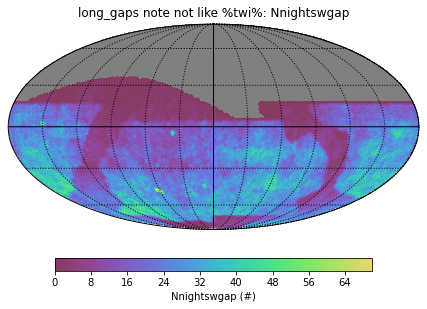

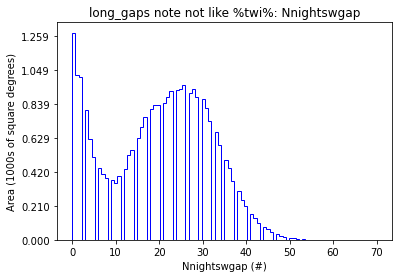

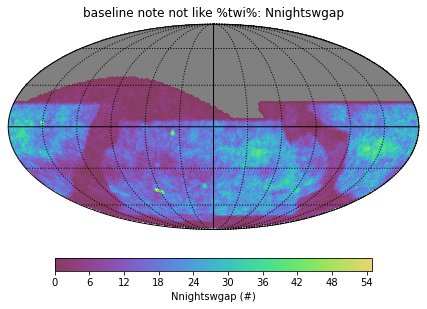

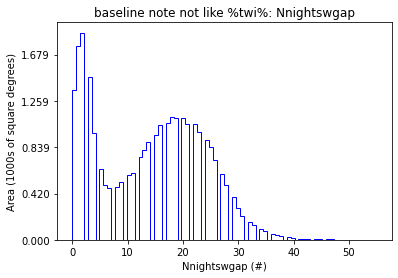

In [4]:
def nover4(inarr):
    return np.where(inarr > 4/24.)[0].size
    


plotDict = {} # {'colorMin': 0.5, 'colorMax': 5}
for db,name in zip(dbs,names):
    bundleList = []

    metric = Nnightswgap()

    slicer = maf.slicers.HealpixSlicer()
    constraint = 'note not like "%twi%"'
    summary_stats = [maf.metrics.SumMetric()]
    bundleList.append(maf.MetricBundle(metric, slicer, constraint, runName=name,
                                       plotDict=plotDict, summaryMetrics=summary_stats))

    outDir = 'temp'
    bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
    bg = maf.MetricBundleGroup(bd, db, outDir='temp')
    bg.runAll()
    bg.plotAll(closefigs=False)
    print(name, bundleList[0].summaryValues)

In [5]:
print(name, bundleList[0].summaryValues)

baseline {'Sum': 1897728.0}
